In [1280]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.metrics import accuracy_score
import os
from scipy import stats
from sklearn.preprocessing import scale
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [1281]:
df=pd.read_csv('../input/heart.csv')

In [1282]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [1283]:
df.info() #No Null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


<Figure size 864x576 with 0 Axes>

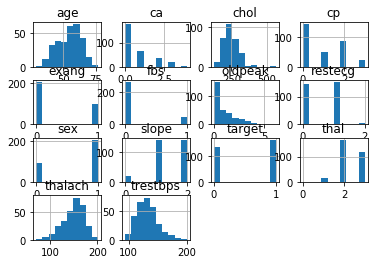

In [1284]:
plt.figure(figsize=(12,8))
plt.tight_layout()
df.hist()
plt.show()
# Histogram as chol has some skewness applying log function to chol

In [1285]:
#chl and oldpeak having skewness
df['chol']=np.log(df['chol'])


<Figure size 864x576 with 0 Axes>

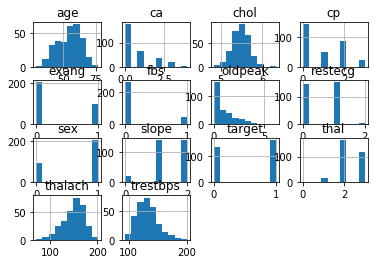

In [1286]:
plt.figure(figsize=(12,8))
plt.tight_layout()
df.hist()
plt.show()

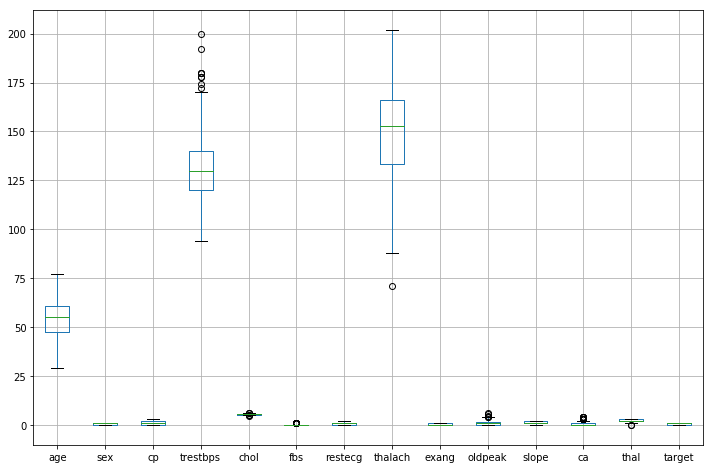

In [1287]:
plt.figure(figsize=(12,8))
plt.tight_layout()
df.boxplot()
plt.show()

#Finding the Outliers

In [1288]:
z=np.abs(stats.zscore(df))

In [1289]:
#Removing the outliers
df = df[(z < 3).all(axis=1)]



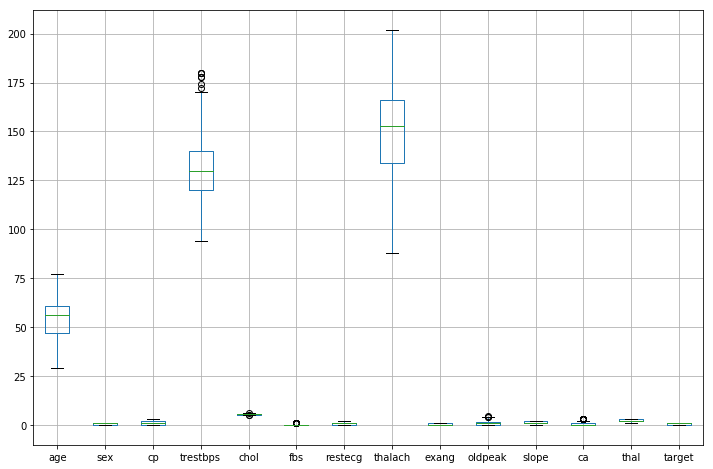

In [1290]:
plt.figure(figsize=(12,8))
plt.tight_layout()
df.boxplot()
plt.show()

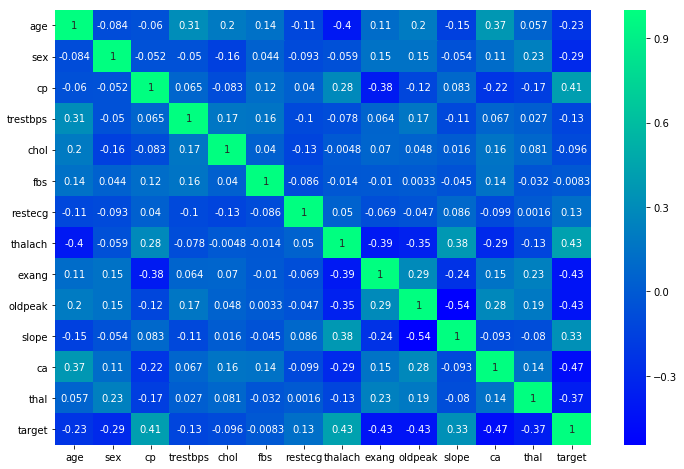

In [1291]:
#corelation map
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='winter',annot=True)

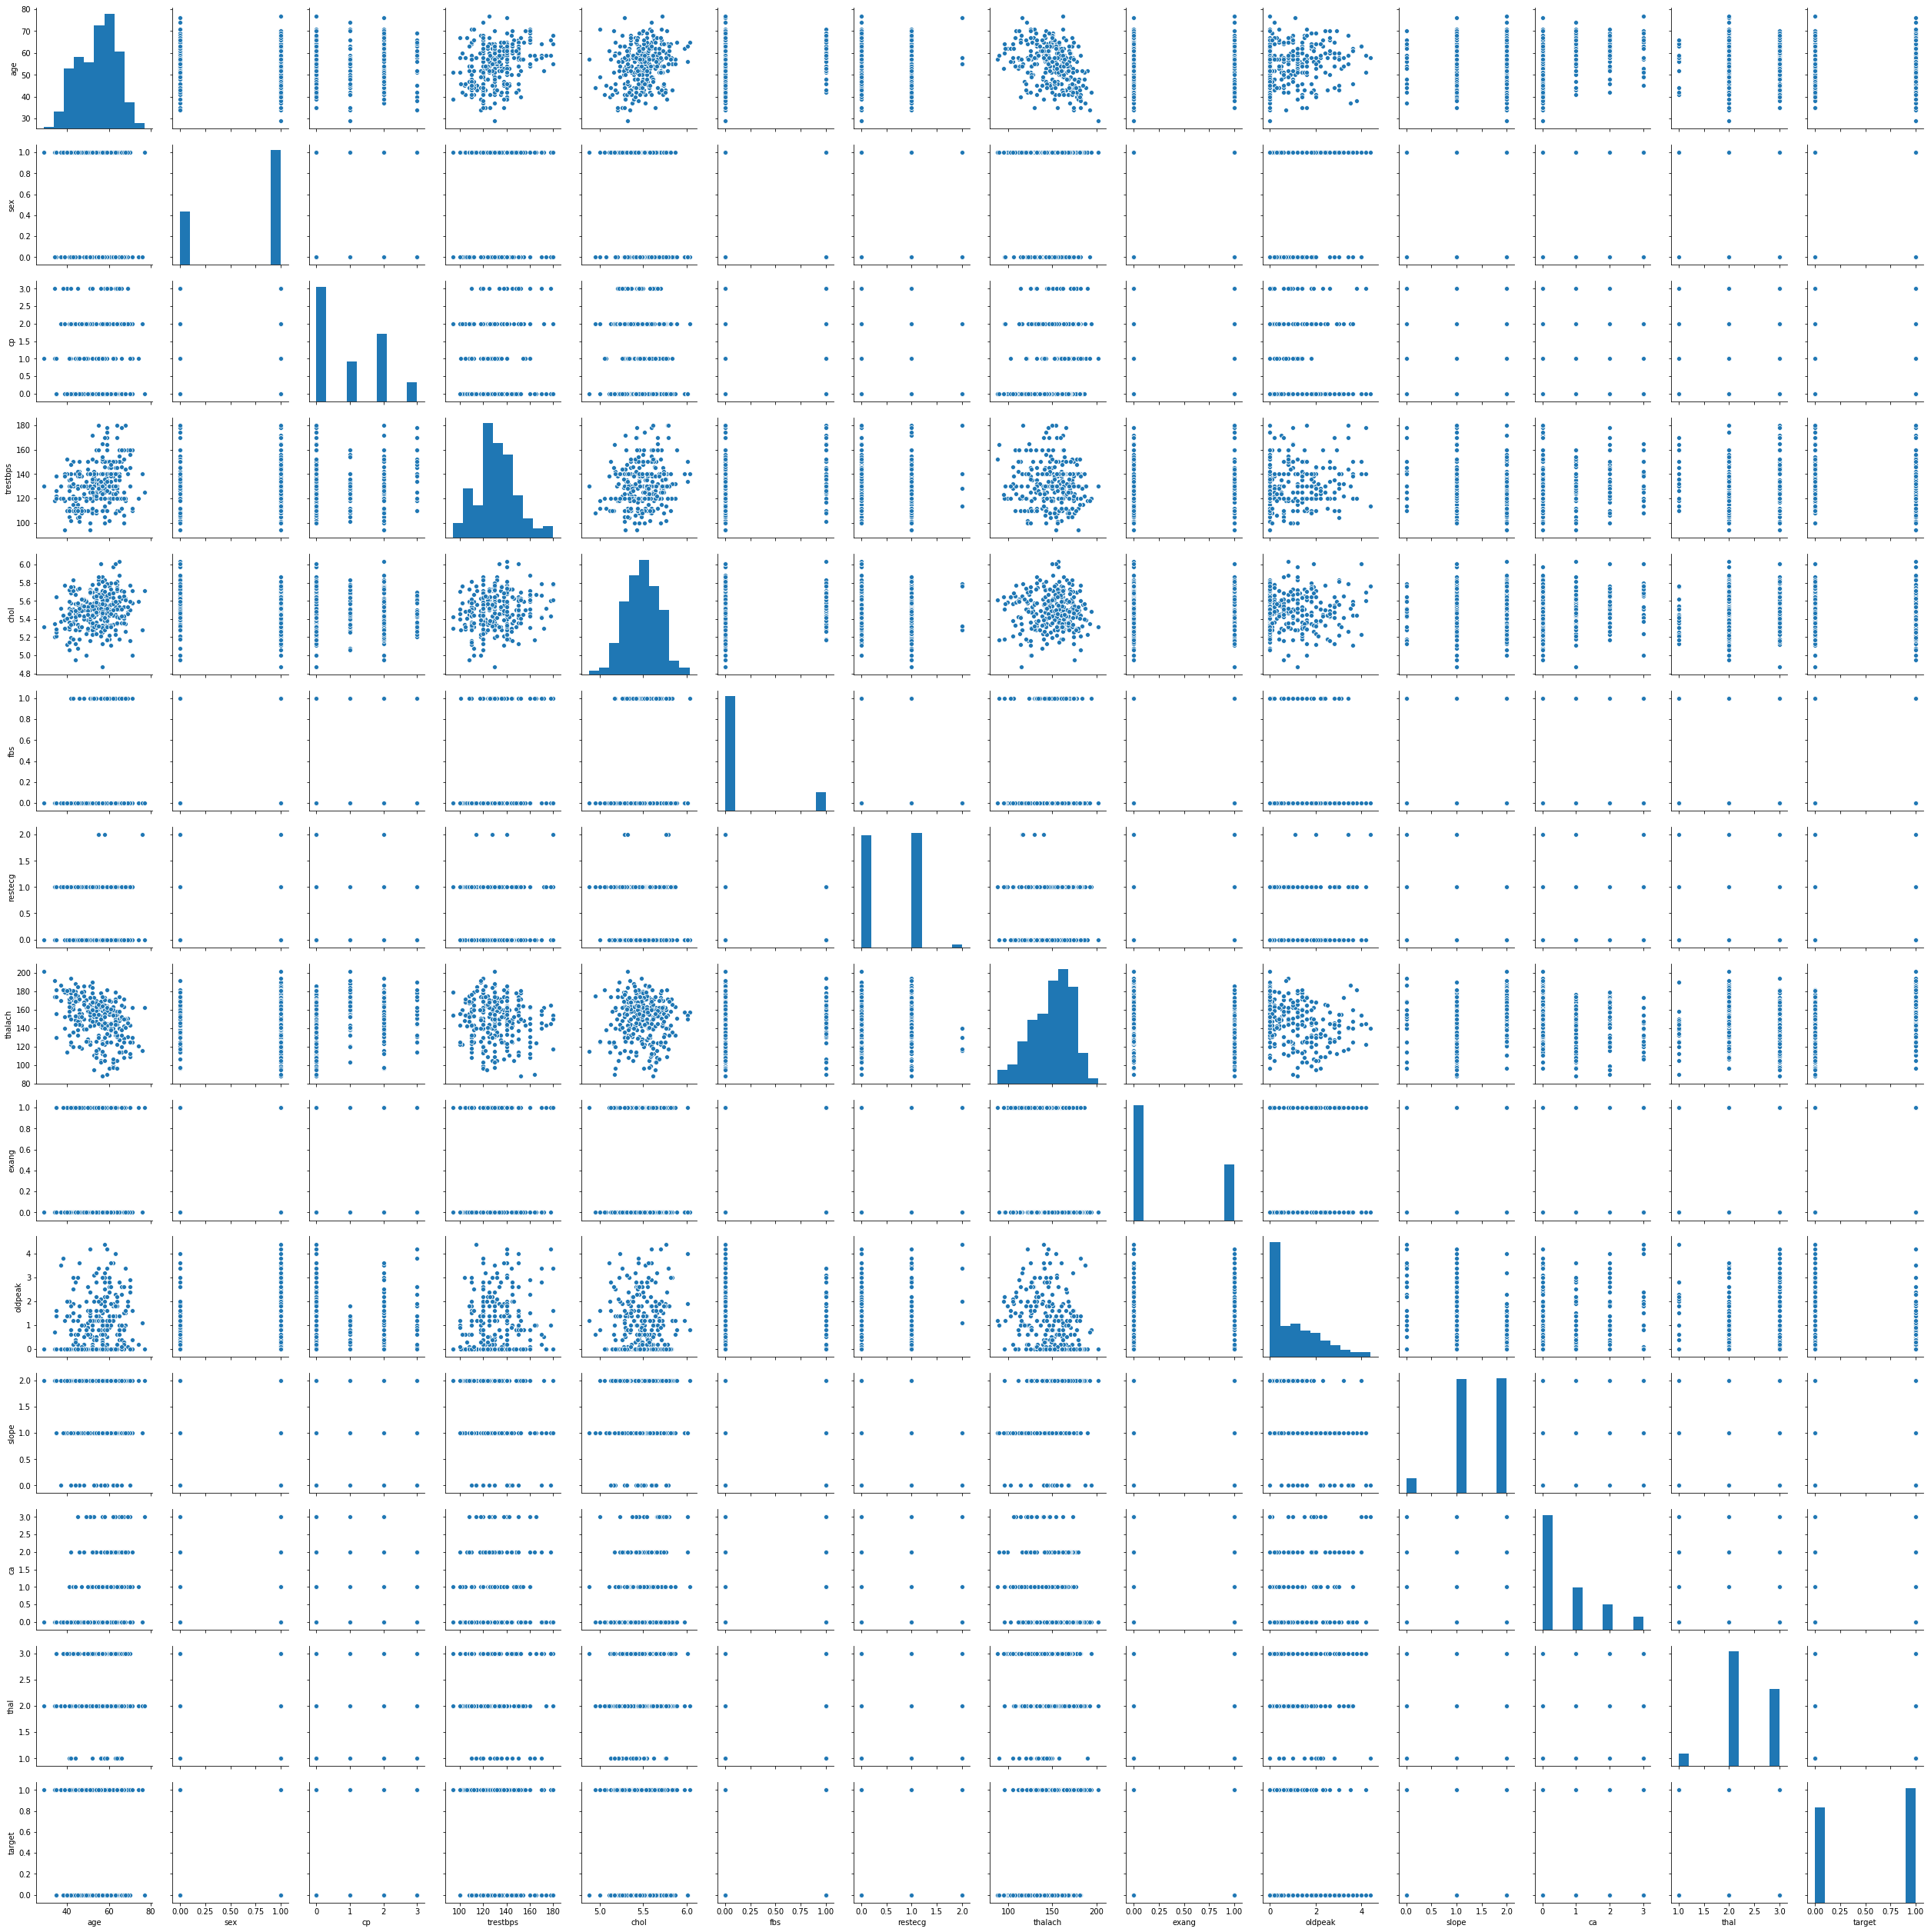

<Figure size 720x576 with 0 Axes>

In [1292]:
sns.pairplot(df)
plt.figure(figsize=(10,8))
plt.show()

In [1293]:
#change the values to Bins
bins=[35,45,55,65,75]
labels=['>35','>45','>55','>65']
df['Age_cat']=pd.cut(df['age'],bins=bins,labels=labels)

In [1294]:
dummy_df=pd.get_dummies(df,columns=['cp','fbs','restecg','exang','slope','ca','thal','Age_cat'])

In [1295]:
dummy_df=dummy_df.drop(columns=['age'])

In [1296]:
Feature=dummy_df.drop(columns='target')
Target=dummy_df['target']

In [1297]:
kbest=SelectKBest(chi2)
best_fit=kbest.fit(Feature,Target)

In [1298]:
#Select columns which has more 15 score during chi2 square test
columns=list()
for i,j in zip(Feature.columns.tolist(),best_fit.scores_.tolist()):
    if j>=15:
        print(i,'=',j)
        columns.append(i)



thalach = 176.82316927145195
oldpeak = 61.83893137307241
cp_0 = 37.960092409929956
cp_1 = 15.911939961993099
cp_2 = 17.45100975939704
exang_0 = 17.417831345824535
exang_1 = 35.56904506410484
slope_1 = 21.478550083565064
slope_2 = 22.67912358681998
ca_0 = 29.175147357232575
ca_2 = 19.08439906715103
thal_2 = 36.79172467310612
thal_3 = 44.29803925566535


In [1299]:
columns=pd.Series(columns)

In [1300]:
Feature=dummy_df.loc[:,columns]

In [1301]:
Feature.columns

Index(['thalach', 'oldpeak', 'cp_0', 'cp_1', 'cp_2', 'exang_0', 'exang_1',
       'slope_1', 'slope_2', 'ca_0', 'ca_2', 'thal_2', 'thal_3'],
      dtype='object')

In [1302]:
 Feature=scale(Feature)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [1303]:
XR,XT,YR,YT= train_test_split(Feature,Target,test_size=0.20,random_state=1)

In [1304]:
model=LogisticRegression().fit(XR,YR)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1305]:
ypred=model.predict(XT)

In [1306]:
accuracy_score(YT,ypred)

0.7931034482758621

In [1307]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(max_depth=4,).fit(XR,YR)
ypred=model2.predict(XT)
accuracy_score(YT,ypred)

0.7586206896551724

In [1308]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(max_depth=15).fit(XR,YR)
ypred=model3.predict(XT)
accuracy_score(YT,ypred)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7241379310344828

In [1309]:
from sklearn.decomposition import PCA
data_transoform=PCA(n_components=10).fit(XR)

In [1310]:
pca_values=data_transoform.fit_transform(XR)

In [1311]:
model.fit(pca_values,YR)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1312]:
model.score(pca_values,YR)

0.8744588744588745

In [1313]:
data_transoform=PCA(n_components=10).fit(XT)
pca_values=data_transoform.fit_transform(XT)


In [1314]:
model.score(pca_values,YT)

0.8448275862068966

In [1315]:
pca_values1=PCA().fit_transform(XR)
model2.fit(pca_values1,YR)
print("train score",model2.score(pca_values1,YR))
pca_values2=PCA().fit_transform(XT)
print("test score",model2.score(pca_values2,YT))

train score 0.9393939393939394
test score 0.7931034482758621


In [1316]:
pca_values1=PCA().fit_transform(XR)
model3.fit(pca_values1,YR)
print("train score",model3.score(pca_values1,YR))
pca_values2=PCA().fit_transform(XT)
print("test score",model3.score(pca_values2,YT))

train score 0.9913419913419913
test score 0.7758620689655172


In [1317]:
from xgboost import XGBClassifier
model4=XGBClassifier()

In [1318]:
pca_values1=PCA().fit_transform(XR)
model4.fit(pca_values1,YR)
print("train score",model4.score(pca_values1,YR))
pca_values2=PCA().fit_transform(XT)
print("test score",model4.score(pca_values2,YT))

train score 0.9913419913419913
test score 0.8103448275862069


In [1319]:
from sklearn.svm import SVC
model5=SVC(C=1,kernel='rbf')

In [1320]:
pca_values1=PCA().fit_transform(XR)
model5.fit(pca_values1,YR)
print("train score",model5.score(pca_values1,YR))
pca_values2=PCA().fit_transform(XT)
print("test score",model5.score(pca_values2,YT))

train score 0.9047619047619048
test score 0.8620689655172413


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
